# Importamos las librerias necesarias

In [3]:
import pandas as pd

# 1. Cargamos la data

In [4]:
#salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary = pd.read_csv('SalaryData.csv')

In [5]:
salary.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [6]:
salary.info()

#Tenemos 40 registros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


# 2. Seleccionamos la variable objetivo y caracteristicas.

In [7]:
salary.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [8]:
#Definimos la variable objetivo

y = salary['Salary']

#Definimos las variables predictoras

X = salary[['Experience Years']]

# 3. Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

#El random state establece una semila para el generador de numeros aleatorios.
#Esto garantiza que los resultados sean reproducibles.

In [10]:
X_train.head(2)

,Experience Years
28,6.5
31,7.9


In [11]:
y_train.head()

28     90000
31    101302
34    109431
20     64500
4      43525
Name: Salary, dtype: int64

In [12]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28,), (12,))

# 4. Seleccionamos el modelo

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 5. Entrenamos/Ajustamos el modelo

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
# Obtenemos el intercepto
intercept = model.intercept_
intercept

26596.961311068262

In [17]:
# Obtenemos los coeficientes
coeficientes = model.coef_
coeficientes

array([9405.61663234])

# 6. Predecimos con el modelo

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([ 90555.15441095,  59516.61952424, 106544.70268592,  64219.42784041,
        68922.23615658, 123474.81262412,  84911.78443155,  63278.86617718,
        65159.98950364,  61397.74285071,  37883.70126987,  50111.00289191])

# 7. Precisión del modelo

In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [21]:
mae = mean_absolute_error(y_test,y_pred)
mae

#Error Absoluto medio(MAE) Indica en promedio cuanto difieren las predicciones del modelo con las reales.


4005.9263101681768

In [25]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

#Muestra el % del MAE

0.06384602996141632

In [26]:
mse = mean_squared_error(y_test,y_pred)
mse

#Error Cuadratico Medio

24141421.671440993

In [27]:
# Calcular la Raiz del Error Cuadratico Medio (RMSE) 

import numpy as np

rmse = np.sqrt(mse)

rmse

#Significa que en promedio, las predicciones se desvian ±4913.39 unidades del valor real

#Mas intuitivo


4913.3920738570205

In [28]:
print("MEAN ABSOLUTE ERROR (MAE): ", mae)
print("MEAN SQUARED ERROR (MSE): ", mse)
print("ROOT MEAN SQUARED EROOR (RMSE): ", rmse)
print("MEAN ABSOLUTE PERCENTAGE ERROR (MAPE): ", mape)

MEAN ABSOLUTE ERROR (MAE):  4005.9263101681768
MEAN SQUARED ERROR (MSE):  24141421.671440993
ROOT MEAN SQUARED EROOR (RMSE):  4913.3920738570205
MEAN ABSOLUTE PERCENTAGE ERROR (MAPE):  0.06384602996141632


In [29]:
from sklearn.metrics import r2_score

# Calcula el R-squared
r_squared = r2_score(y_test, y_pred)

print("R-squared: ", r_squared)


R-squared:  0.960233432146844


# Resultados

## Salario = Intercepto + (Coeficiente x AñosDeExperiencia)




In [44]:
anios = float(input("Años de experiencia laboral"))

calc_predicc = intercept + (coeficientes[0] * anios)

calc_predicc

Años de experiencia laboral3


54813.81120807484

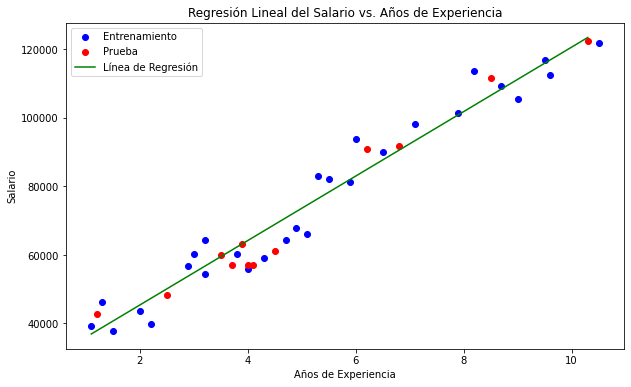

In [45]:
import matplotlib.pyplot as plt

# Generar puntos para la línea de regresión
x_range = np.linspace(X_train.min(), X_test.max(), 100)
y_line = model.intercept_ + model.coef_[0] * x_range

# Graficar los datos de entrenamiento y prueba, y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Prueba')
plt.plot(x_range, y_line, color='green', label='Línea de Regresión')
plt.title('Regresión Lineal del Salario vs. Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()
